In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
# Select only numerical features
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import joblib
from sklearn.preprocessing import OrdinalEncoder
import optuna
from xgboost import XGBClassifier

# Load Data

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (3)\Titanic-Dataset.csv")
from sklearn.model_selection import train_test_split
Data_Frame, test = train_test_split(df, test_size=0.2, random_state=42)
test.to_csv("test_df.csv", index=False)

# Data overview

In [3]:
Data_Frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
len(Data_Frame)

712

In [5]:
Data_Frame.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
Data_Frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


# NULLS

In [7]:
Data_Frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
dtype: int64

# Distribution of Age

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


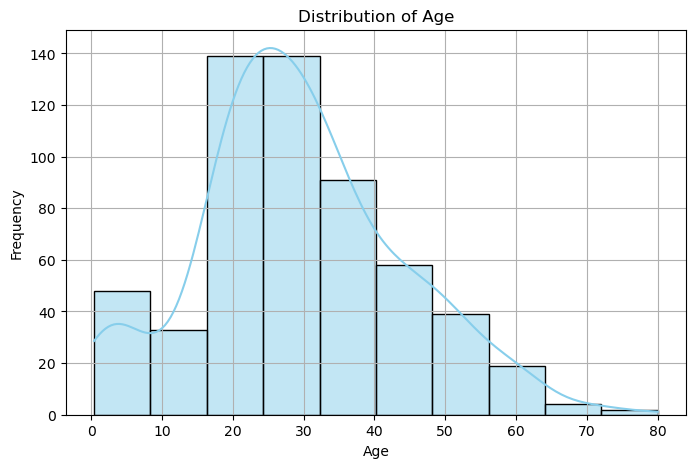

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(Data_Frame['Age'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:

mean_age = (stats.tmean(Data_Frame['Age'].dropna()))  
median_age = (np.nanmedian(Data_Frame['Age']))        
mode_age = (stats.mode(Data_Frame['Age'].dropna(), keepdims=True).mode[0])  

print(f"Mean = {mean_age}, Median = {median_age}, Mode = {mode_age}")

Mean = 29.498846153846156, Median = 28.0, Mode = 24.0


 # Deal With Outliers

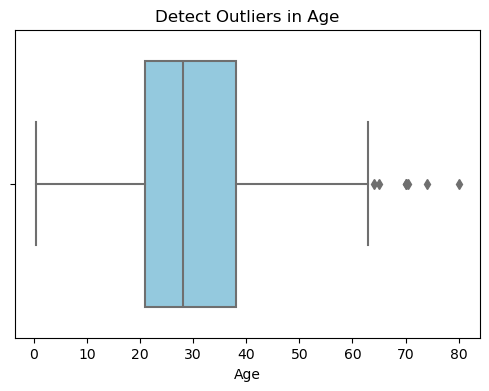

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=Data_Frame["Age"], color="skyblue")
plt.title("Detect Outliers in Age")
plt.xlabel("Age")
plt.show()

In [11]:
import pickle

age = Data_Frame['Age'] 
Q1 = age.quantile(0.25)
Q2_age= age.median()
with open('q2_age.pkl', 'wb') as f:
    pickle.dump(Q2_age, f)
Q3 = age.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

boxplot_min = age[age >= lower_bound].min()
boxplot_max = age[age <= upper_bound].max()

print(f"Q1: {Q1}")
print(f"Q2 (Median): {Q2_age}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Boxplot Min (no outliers): {boxplot_min}")
print(f"Boxplot Max (no outliers): {boxplot_max}")

Q1: 21.0
Q2 (Median): 28.0
Q3: 38.0
IQR: 17.0
Lower Bound: -4.5
Upper Bound: 63.5
Boxplot Min (no outliers): 0.42
Boxplot Max (no outliers): 63.0


In [12]:
outliers = Data_Frame[(Data_Frame['Age'] < lower_bound) | (Data_Frame['Age'] > upper_bound)]
max_outlier = outliers['Age'].max()
# Print how many
print(f"Number of outliers in Age: {outliers.shape[0]}")
max_outlier

Number of outliers in Age: 7


80.0

In [13]:
Data_Frame['Age'].mean()

29.498846153846156

In [14]:
Data_Frame['Age'] = Data_Frame['Age'].apply(lambda x: Q2_age if x < lower_bound or x > upper_bound else x)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


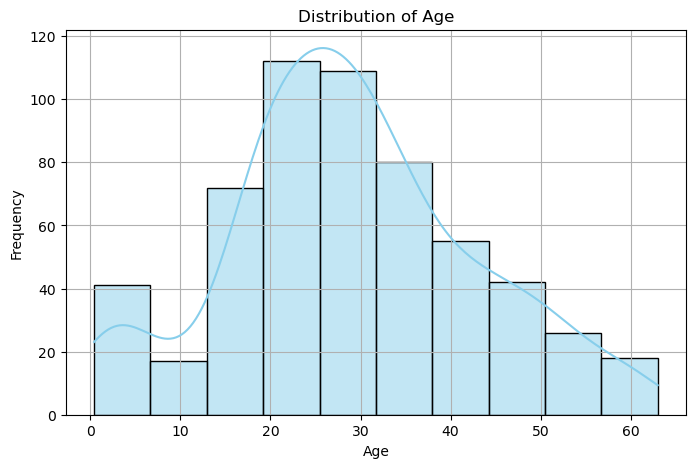

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(Data_Frame['Age'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [16]:
mean_age = (stats.tmean(Data_Frame['Age'].dropna()))  
median_age = (np.nanmedian(Data_Frame['Age']))        
mode_age = (stats.mode(Data_Frame['Age'].dropna(), keepdims=True).mode[0])  

print(f"Mean = {mean_age}, Median = {median_age}, Mode = {mode_age}")

Mean = 28.97874125874126, Median = 28.0, Mode = 28.0


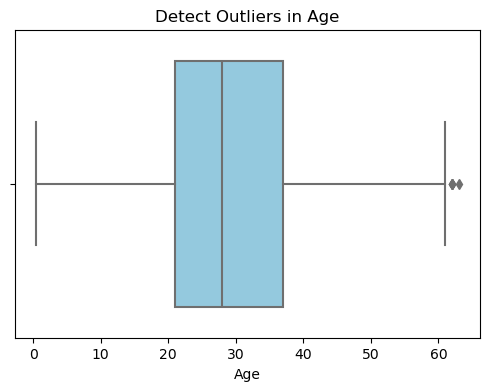

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=Data_Frame["Age"], color="skyblue")
plt.title("Detect Outliers in Age")
plt.xlabel("Age")
plt.show()

In [18]:
outliers = Data_Frame[(Data_Frame['Age'] < lower_bound) | (Data_Frame['Age'] > upper_bound)]
max_outlier = outliers['Age'].max()
# Print how many
print(f"Number of outliers in Age: {outliers.shape[0]}")
max_outlier

Number of outliers in Age: 0


nan

In [19]:
Data_Frame['Age'].mean()

28.97874125874126

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


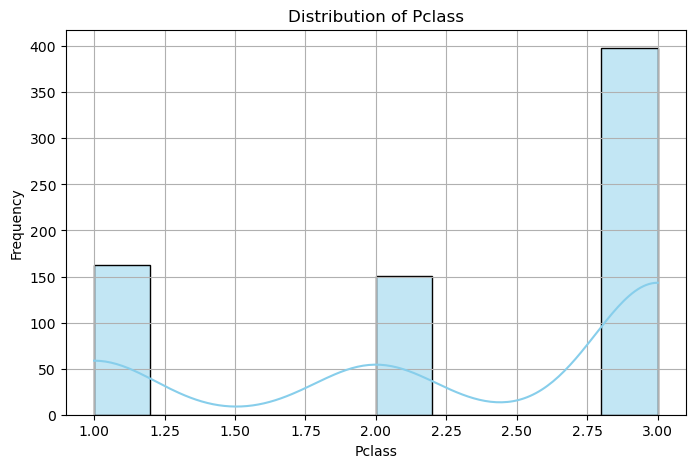

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(Data_Frame['Pclass'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:
mean_pclass = (stats.tmean(Data_Frame['Pclass'].dropna()))  
median_pclass = (np.nanmedian(Data_Frame['Pclass']))        
mode_pclass = (stats.mode(Data_Frame['Pclass'].dropna(), keepdims=True).mode[0])  

print(f"Mean = {mean_pclass}, Median = {median_pclass}, Mode = {mode_pclass}")

Mean = 2.330056179775281, Median = 3.0, Mode = 3


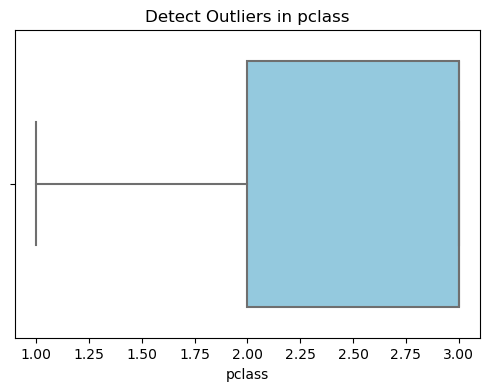

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=Data_Frame["Pclass"], color="skyblue")
plt.title("Detect Outliers in pclass")
plt.xlabel("pclass")
plt.show()

# Deal With Nulls

In [23]:
# Calculate the mean of Age (excluding nulls)
age_mean = Data_Frame['Age'].mean()
with open('age_mean.pkl', 'wb') as f:
    pickle.dump(age_mean, f)
# Replace null values with the mean
Data_Frame['Age'] = Data_Frame['Age'].fillna(age_mean)

In [24]:
Data_Frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
dtype: int64

In [25]:
# Calculate the mean of Age (excluding nulls)
cabin_mode = Data_Frame['Cabin'].mode().iloc[0]
with open('cabin_mode.pkl', 'wb') as f:
    pickle.dump(cabin_mode, f)
# Replace null values with the mean
Data_Frame['Cabin'] = Data_Frame['Cabin'].fillna(cabin_mode)

In [26]:
Data_Frame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [27]:
embark_mode = Data_Frame['Embarked'].mode().iloc[0]
with open('embark_mode.pkl', 'wb') as f:
    pickle.dump(embark_mode, f)
# Replace null values with the mean
Data_Frame['Embarked'] = Data_Frame['Embarked'].fillna(embark_mode)

In [28]:
Data_Frame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [29]:
num_duplicates = Data_Frame.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


# Feature Engineering

In [30]:
Data_Frame['FamilySize'] = Data_Frame['SibSp'] + Data_Frame['Parch'] + 1
def categorize_family_size(size):
    if size == 1:
        return 'Single'
    elif size <= 3:
        return 'Small'
    elif size <= 6:
        return 'Medium'
    else:
        return 'Large'

Data_Frame['FamilyCategory'] = Data_Frame['FamilySize'].apply(categorize_family_size)
Data_Frame.drop(['Parch', 'SibSp'], axis=1, inplace=True)

In [31]:
bins = [0, 12, 18, 30, 45, 63.5]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Mid-age Adult']

Data_Frame['AgeGroup'] = pd.cut(Data_Frame['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

In [32]:
Data_Frame

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyCategory,AgeGroup
331,332,0,1,"Partner, Mr. Austen",male,45.500000,113043,28.5000,C124,S,1,Single,Mid-age Adult
733,734,0,2,"Berriman, Mr. William John",male,23.000000,28425,13.0000,C23 C25 C27,S,1,Single,Young Adult
382,383,0,3,"Tikkanen, Mr. Juho",male,32.000000,STON/O 2. 3101293,7.9250,C23 C25 C27,S,1,Single,Adult
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.000000,350025,7.8542,C23 C25 C27,S,2,Small,Young Adult
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.000000,347082,31.2750,C23 C25 C27,S,7,Large,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.000000,343120,7.6500,C23 C25 C27,S,1,Single,Young Adult
270,271,0,1,"Cairns, Mr. Alexander",male,28.978741,113798,31.0000,C23 C25 C27,S,1,Single,Young Adult
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.000000,350026,14.1083,C23 C25 C27,S,3,Small,Adult
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.000000,113760,120.0000,B96 B98,S,4,Medium,Teen


# Handle Data Types

In [33]:
Data_Frame['Pclass'] = Data_Frame['Pclass'].astype('object')
Data_Frame.dtypes

PassengerId          int64
Survived             int64
Pclass              object
Name                object
Sex                 object
Age                float64
Ticket              object
Fare               float64
Cabin               object
Embarked            object
FamilySize           int64
FamilyCategory      object
AgeGroup          category
dtype: object

# Annova

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif
# apply Annova
# 1. Separate features and target
X_train = Data_Frame.drop(columns=['Survived'])
y_train = Data_Frame['Survived']

# 2. Keep only numerical columns from training set
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

# 3. Apply ANOVA on training data
selector = SelectKBest(score_func=f_classif, k=1)  
X_train_selected = selector.fit_transform(X_train_num, y_train)

# 4. Get selected and unselected numerical feature names
selected_features = X_train_num.columns[selector.get_support()]
unselected_features = X_train_num.columns.difference(selected_features)
X_num_selected_df = X_train_num[selected_features]
# 5. Drop unselected numerical features from original DataFrame
Data_Frame = Data_Frame.drop(columns=unselected_features)

# 6. (Optional) Print result
print("Removed numerical features:", unselected_features.tolist())
print("Remaining columns in DataFrame:", Data_Frame.columns.tolist())

Removed numerical features: ['Age', 'FamilySize', 'PassengerId']
Remaining columns in DataFrame: ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCategory', 'AgeGroup']


In [35]:
Data_Frame['Pclass'] = Data_Frame['Pclass'].astype('int64')

# Handle Non Numerical Columns For Encoding

In [36]:
# Extract only the titles from the 'Name' column
Data_Frame['Title'] = Data_Frame['Name'].str.extract(r',\s*(\w+)\.')




In [37]:
Data_Frame.drop(columns=['Name'], inplace=True)

In [38]:
print(Data_Frame['Title'].value_counts())

Title
Mr        419
Miss      143
Mrs        96
Master     33
Rev         5
Dr          5
Major       2
Col         2
Mlle        2
Capt        1
Mme         1
Ms          1
Lady        1
Name: count, dtype: int64


In [39]:
Title_mode = Data_Frame['Title'].mode().iloc[0]

Data_Frame['Title'] = Data_Frame['Title'].fillna(Title_mode)

In [40]:

# Step 1: Convert all tickets to string
Data_Frame['Ticket'] = Data_Frame['Ticket'].astype(str)

# Step 2: Extract only characters before the first digit (i.e., the prefix)
Data_Frame['Ticket_Prefix'] = Data_Frame['Ticket'].str.extract(r'^([^\d]+)')

# Step 3: Clean up - remove leading/trailing spaces and dots
Data_Frame['Ticket_Prefix'] = Data_Frame['Ticket_Prefix'].str.strip()
Data_Frame['Ticket_Prefix'] = Data_Frame['Ticket_Prefix'].str.replace('.', '', regex=False)

# Step 4: Fill missing prefixes (NaN) with mode
mode_prefix = Data_Frame['Ticket_Prefix'].mode()[0]
with open('prefix_mode.pkl', 'wb') as f:
    pickle.dump(mode_prefix, f)
Data_Frame['Ticket_Prefix'] = Data_Frame['Ticket_Prefix'].fillna(mode_prefix)




In [41]:


# Step 2: Create frequency map
freq_map = Data_Frame['Ticket_Prefix'].value_counts(normalize=False)
with open('freq_map.pkl', 'wb') as f:
    pickle.dump(freq_map, f)
# Step 3: Map frequencies to the column

Data_Frame['Ticket_Prefix'] = Data_Frame['Ticket_Prefix'].map(freq_map)



In [42]:
#TO know unique categories
set(Data_Frame['Ticket_Prefix'])

{1, 2, 3, 4, 5, 7, 11, 16, 21, 36, 570}

In [43]:
Data_Frame['Cabin_Deck'] = Data_Frame['Cabin'].str.extract(r'^([A-Za-z]+)', expand=False)


In [44]:
Data_Frame.drop(columns=['Cabin'], inplace=True)

In [45]:
Data_Frame = pd.get_dummies(Data_Frame, columns=['Sex', 'Embarked','FamilyCategory'], drop_first=False)
# One-hot encode 'Sex' and 'Embarked'


# Identify one-hot encoded columns (or specify them if you know)
one_hot_cols = [col for col in Data_Frame.columns if col.startswith('Sex_') or col.startswith('Embarked_') or col.startswith('FamilyCategory_')]

# Replace integer 0 → 'False', 1 → 'True'
for col in one_hot_cols:
     Data_Frame[col] = Data_Frame[col].replace({False: 0, True: 1})

label_cols = ['Ticket_Prefix', 'Cabin_Deck', 'Title','AgeGroup']  # Add any other categorical columns you're using

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on the training data and transform
Data_Frame[label_cols] = ordinal_encoder.fit_transform(Data_Frame[label_cols])

# Save the fitted encoder
with open('ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(ordinal_encoder, f)


In [46]:
Data_Frame.drop(columns=['Ticket'], inplace=True)

In [47]:
Data_Frame.dtypes

Survived                   int64
Pclass                     int64
Fare                     float64
AgeGroup                 float64
Title                    float64
Ticket_Prefix            float64
Cabin_Deck               float64
Sex_female                 int64
Sex_male                   int64
Embarked_C                 int64
Embarked_Q                 int64
Embarked_S                 int64
FamilyCategory_Large       int64
FamilyCategory_Medium      int64
FamilyCategory_Single      int64
FamilyCategory_Small       int64
dtype: object

# Chi Square

In [58]:
y_train = Data_Frame['Survived']
X_train = Data_Frame.drop(columns=['Survived'])
excluded_cols = ['Fare', 'PassengerId']
X_cat = X_train.drop(columns=[col for col in excluded_cols if col in X_train.columns])


chi_selector = SelectKBest(score_func=chi2, k=6)
chi_selector.fit(X_cat, y_train)
chi_features = X_cat.columns[chi_selector.get_support()]
X_cat_selected_df = X_cat[chi_features]
print("✅ Selected categorical features (Chi-Square):", chi_features.tolist())

✅ Selected categorical features (Chi-Square): ['Pclass', 'AgeGroup', 'Sex_female', 'Sex_male', 'Embarked_C', 'FamilyCategory_Small']


# Final Data Frame

In [59]:
selected_features=pd.DataFrame(selected_features)

final_X_df = pd.concat([X_num_selected_df, X_cat_selected_df], axis=1)

# Step 5: Add target column back
final_df = pd.concat([final_X_df, y_train], axis=1)
selected_features

,0
0,Fare


In [60]:
final_df.head(5)

,Fare,Pclass,AgeGroup,Sex_female,Sex_male,Embarked_C,FamilyCategory_Small,Survived
331,28.5000,1,2.0,0,1,0,0,0
733,13.0000,2,4.0,0,1,0,0,0
382,7.9250,3,0.0,0,1,0,0,0
704,7.8542,3,4.0,0,1,0,1,0
813,31.2750,3,1.0,1,0,0,0,0


# MODELS

In [61]:
X = final_df.drop(columns=['Survived'])
y = final_df['Survived']
# 2. Split into train and test sets


# 3. Initialize Decision Tree model
param_grid = {
    'criterion': ['gini', 'entropy'],                # dropped 'log_loss'
    'splitter': ['best'],                            # dropped 'random'
    'max_depth': [3,4,5, 10, None],                      # reduced to 3 values
    'min_samples_split': [2, 10],                    # reduced to 2
    'min_samples_leaf': [1, 3],                      # reduced to 2
                
    'max_leaf_nodes': [None, 50],                    # reduced to 2
                       # reduced to 2
}

# 3. Initialize and run GridSearchCV
dt_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X, y)

# 4. Evaluate best model
best_model = grid_search.best_estimator_
print("✅ Best Hyperparameters:", grid_search.best_params_)

# Training metrics
y_train_pred = best_model.predict(X)
print("\n✅ Training Accuracy:", accuracy_score(y, y_train_pred))
print("📊 Training Confusion Matrix:\n", confusion_matrix(y, y_train_pred))
print("📋 Training Classification Report:\n", classification_report(y, y_train_pred))
joblib.dump(best_model, 'DT_model.pkl')


Fitting 5 folds for each of 80 candidates, totalling 400 fits
✅ Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

✅ Training Accuracy: 0.9030898876404494
📊 Training Confusion Matrix:
 [[429  15]
 [ 54 214]]
📋 Training Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       444
           1       0.93      0.80      0.86       268

    accuracy                           0.90       712
   macro avg       0.91      0.88      0.89       712
weighted avg       0.91      0.90      0.90       712



['DT_model.pkl']

In [62]:
param_grid = {
    'n_estimators': [100, 200,300,400],             # Add more trees to improve stability
    'max_depth': [5, 7, 9,10],                 # Slightly deeper trees
          # Try different feature subsets
}
# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X, y)

# Best model
best_rf = grid_search.best_estimator_
print("🌟 Best Parameters:", grid_search.best_params_)

# Evaluate on training set
y_train_pred = best_rf.predict(X)
print("\n✅ Training Accuracy:", accuracy_score(y, y_train_pred))
print("📊 Training Confusion Matrix:\n", confusion_matrix(y, y_train_pred))
print("📋 Training Classification Report:\n", classification_report(y, y_train_pred))

# Evaluate on validation set

joblib.dump(best_rf, 'best_rf_model.pkl')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
🌟 Best Parameters: {'max_depth': 7, 'n_estimators': 400}

✅ Training Accuracy: 0.8932584269662921
📊 Training Confusion Matrix:
 [[428  16]
 [ 60 208]]
📋 Training Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       444
           1       0.93      0.78      0.85       268

    accuracy                           0.89       712
   macro avg       0.90      0.87      0.88       712
weighted avg       0.90      0.89      0.89       712



['best_rf_model.pkl']

In [63]:
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [2, 3.4,5,6,7],
    'learning_rate': [0.01, 0.1],
    
}

# 2. Model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 3. Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,  # reduce for faster tuning
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X, y)
# 5. Best model
best_xgb = grid_search.best_estimator_
print("🌟 Best Parameters:", grid_search.best_params_)

# 6. Evaluate on train
y_train_pred = best_xgb.predict(X)
print("\n✅ Training Accuracy:", accuracy_score(y, y_train_pred))
print("📊 Training Confusion Matrix:\n", confusion_matrix(y, y_train_pred))
print("📋 Training Classification Report:\n", classification_report(y, y_train_pred))




# 8. Save the model
joblib.dump(best_xgb, 'best_xgb_model.pkl')

Fitting 3 folds for each of 30 candidates, totalling 90 fits
🌟 Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

✅ Training Accuracy: 0.901685393258427
📊 Training Confusion Matrix:
 [[426  18]
 [ 52 216]]
📋 Training Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       444
           1       0.92      0.81      0.86       268

    accuracy                           0.90       712
   macro avg       0.91      0.88      0.89       712
weighted avg       0.90      0.90      0.90       712



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1519, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\HP\anaconda3\Lib\si

['best_xgb_model.pkl']

In [54]:
param_grid = {
    'n_neighbors': list(range(2, 3)),  # try neighbors from 1 to 30
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

# 2. Create a KNN model
knn = KNeighborsClassifier()

# 3. Setup GridSearchCV
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# 4. Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# 5. Best model
best_knn = grid_search.best_estimator_
print("🌟 Best Parameters:", grid_search.best_params_)

# 6. Training evaluation
y_train_pred = best_knn.predict(X_train)
print("\n✅ Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("📊 Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("📋 Training Classification Report:\n", classification_report(y_train, y_train_pred))

# 7. Validation evaluation
y_val_pred = best_knn.predict(X_val)
print("\n✅ Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
🌟 Best Parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}

✅ Training Accuracy: 0.9480337078651685
📊 Training Confusion Matrix:
 [[444   0]
 [ 37 231]]
📋 Training Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       444
           1       1.00      0.86      0.93       268

    accuracy                           0.95       712
   macro avg       0.96      0.93      0.94       712
weighted avg       0.95      0.95      0.95       712



NameError: name 'X_val' is not defined

In [ ]:
excluded_cols = ['Sex_male', 'Sex_female', 'Survived','Pclass']

# Identify columns to normalize
cols_to_scale = [col for col in final_df.columns if col not in excluded_cols]



# Fit and transform the selected columns
scaler = MinMaxScaler()
final_df[cols_to_scale] = scaler.fit_transform(final_df[cols_to_scale])


In [ ]:
X = final_df.drop(columns=['Survived'])
y = final_df['Survived']

# 2. Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=100)

# 4. Train the model on training data only
log_reg.fit(X_train, y_train)

# 5. Predict on training data
y_train_pred = log_reg.predict(X_train)

# 6. Evaluate on training data
print("✅ Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("📊 Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("📋 Training Classification Report:\n", classification_report(y_train, y_train_pred))

# 7. Predict on validation data
y_val_pred = log_reg.predict(X_val)

# 8. Evaluate on validation data
print("✅ Validation Accuracy:", accuracy_score(y_val, y_val_pred))

In [ ]:
svm_model = SVC(random_state=42)

# 2. Train on training data only
svm_model.fit(X_train, y_train)

# 3. Predict on training data
y_train_pred = svm_model.predict(X_train)

# 4. Evaluate on training data
print("✅ Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("📊 Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("📋 Training Classification Report:\n", classification_report(y_train, y_train_pred))

# 5. Predict on validation data
y_val_pred = svm_model.predict(X_val)
# 6. Evaluate on validation data
print("✅ Validation Accuracy:", accuracy_score(y_val, y_val_pred))

In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 31)),  # try neighbors from 1 to 30
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

# 2. Create a KNN model
knn = KNeighborsClassifier()

# 3. Setup GridSearchCV
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# 4. Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# 5. Best model
best_knn = grid_search.best_estimator_
print("🌟 Best Parameters:", grid_search.best_params_)

# 6. Training evaluation
y_train_pred = best_knn.predict(X_train)
print("\n✅ Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("📊 Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("📋 Training Classification Report:\n", classification_report(y_train, y_train_pred))

# 7. Validation evaluation
y_val_pred = best_knn.predict(X_val)
print("\n✅ Validation Accuracy:", accuracy_score(y_val, y_val_pred))

In [64]:
final_df.to_csv("train_df.csv", index=False)

In [ ]:
final_df